<a href="https://colab.research.google.com/github/vincent0426/ITTM/blob/main/MBTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import torch
print(sys.version)

3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
# df = pd.read_csv("./drive/MyDrive/Colab Notebooks/文字探勘/MBTI 500.csv")
# display(df.head())
# print(df['type'].value_counts())

In [5]:
# posts = np.array(df['posts'])
# MBTItype = np.array(df['type'])
# print(posts.shape)
# print(MBTItype.shape)

In [6]:
# df1 = pd.read_csv('./drive/MyDrive/Colab Notebooks/文字探勘/mbti_1.csv')
# df2 = pd.read_csv('./drive/MyDrive/Colab Notebooks/文字探勘/mbti_full_pull.csv')
df1 = pd.read_csv('./drive/MyDrive/111-1ITTM/mbti_1.csv')
df2 = pd.read_csv('./drive/MyDrive/111-1ITTM/mbti_full_pull.csv')
df1 = df1[['posts','type']]
display(df1.head())
df2.drop(['author_flair_text'], axis=1, inplace=True)
df2 = df2.rename(columns={"body": "posts", "subreddit": "type"})
df2['type'] = df2['type'].str.upper()
display(df2.head())

,posts,type
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ
1,'I'm finding the lack of me in these posts ver...,ENTP
2,'Good one _____ https://www.youtube.com/wat...,INTP
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ
4,'You're fired.|||That's another silly misconce...,ENTJ


,posts,type
0,Knowing you're in INTJ is a tool for you to us...,INTJ
1,You are truly an enlightened mastermind.,INTJ
2,You should :) it will help if you have a down ...,INFJ
3,I watch a bit of everything (including hentai)...,INTP
4,I don't know if I would count this as a pet pe...,INTJ


In [7]:
print("df1")
labelcountlist = []
for x in df1.columns:
    labelcountlist.append((len(df1[x].unique())))
labelcount = pd.DataFrame({'Attribute': df1.columns, 'Count': labelcountlist})
print(labelcount)

df1
  Attribute  Count
0     posts   8675
1      type     16


In [8]:
typelist = df1["type"].unique()
typelist

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [9]:
print("df2")
labelcountlist = []
for x in df2.columns:
    labelcountlist.append((len(df2[x].unique())))
labelcount = pd.DataFrame({'Attribute': df2.columns, 'Count': labelcountlist})
print(labelcount)

df2
  Attribute    Count
0     posts  1746611
1      type      520


In [10]:
array_df1 = np.array(df1)
array_df2 = np.array(df2)
array_df2 =  np.array([row for i, row in enumerate(np.array(df2)) if row[1] in typelist])
print(array_df1.shape)
print(array_df2.shape)

(8675, 2)
(1350867, 2)


In [11]:
#ESFJ , ESTJ missing
np.unique(array_df2[:,1])

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFP', 'ESTP', 'INFJ', 'INFP',
       'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], dtype=object)

In [12]:
# posts = np.concatenate((array_df1[:,0], array_df2[:,0]), axis=0)
posts = array_df1[:,0]
# MBTItype = np.concatenate((array_df1[:,1], array_df2[:,1]), axis=0)
MBTItype = array_df1[:,1]
print(len(posts))
print(len(MBTItype))

8675
8675


In [13]:
# 清除nan type很奇怪的資料
badlist = []
for i, p in enumerate(posts):
  if p != p or MBTItype[i] not in typelist:
    badlist.append(i)
posts = np.delete(posts, badlist)
MBTItype = np.delete(MBTItype, badlist)
print(len(badlist))
print(len(posts))
print(len(MBTItype))
count_l = []
for t in typelist:
  count = MBTItype.tolist().count(t)
  count_l.append(count)
  print(f"{t} : {count}")

0
8675
8675
INFJ : 1470
ENTP : 685
INTP : 1304
INTJ : 1091
ENTJ : 231
ENFJ : 190
INFP : 1832
ENFP : 675
ISFP : 271
ISTP : 337
ISFJ : 166
ISTJ : 205
ESTP : 89
ESFP : 48
ESTJ : 39
ESFJ : 42


In [14]:
len(count_l)

16

In [15]:
len(typelist)

16

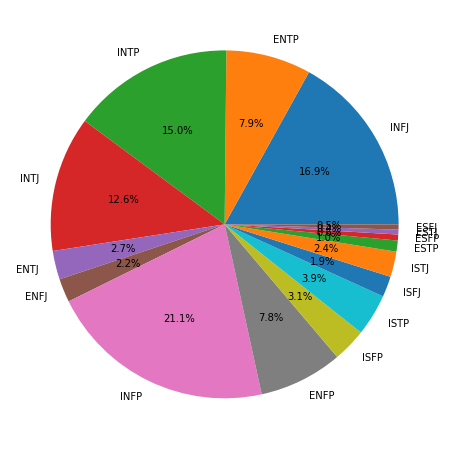

In [16]:
from matplotlib import pyplot as plt
labels = typelist
 
data = count_l

# Creating plot
plt.figure(figsize = (8, 8))
plt.pie(data, labels = labels, autopct='%1.1f%%')

# show plot
plt.show()

In [17]:
import string
import re

def clean_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = [i for i in words if not "http" in i]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words
clean_posts = [clean_text(x) for x in posts]
clean_posts[0]

'enfp  and  intj  moments  sportscenter  not  top  ten  plays  pranks  what  has  been  the  most  lifechanging  experience  in  your  life  on  repeat  for  most  of  today  may  the  perc  experience  immerse  you  the  last  thing  my  infj  friend  posted  on  his  facebook  before  committing  suicide  the  next  day  rest  in  peace  hello  enfj7  sorry  to  hear  of  your  distress  its  only  natural  for  a  relationship  to  not  be  perfection  all  the  time  in  every  moment  of  existence  try  to  figure  the  hard  times  as  times  of  growth  as  84389  84390    welcome  and  stuff  game  set  match  prozac  wellbrutin  at  least  thirty  minutes  of  moving  your  legs  and  i  dont  mean  moving  them  while  sitting  in  your  same  desk  chair  weed  in  moderation  maybe  try  edibles  as  a  healthier  alternative  basically  come  up  with  three  items  youve  determined  that  each  type  or  whichever  types  you  want  to  do  would  more  than  likely  us

In [18]:
import statistics as s

def cal_sta(df, target):
    llen = []
    for text in df[target]:
        llen.append(len(text.split()))
    print("mean: ", s.mean(llen))
    print("median: ", s.median(llen))
    print(np.percentile(llen, 25))
    print(np.percentile(llen, 50))
    print(np.percentile(llen, 75))
    print(np.percentile(llen, 95))
    print("max: ", max(llen))
    print("min: ", min(llen))

In [19]:
df_clean_posts = pd.DataFrame(clean_posts, columns = ['post'])

cal_sta(df_clean_posts, "post")

mean:  1261.4882997118157
median:  1315
1082.0
1315.0
1494.0
1681.0
max:  1929
min:  4


In [20]:
# dictionary of lists  
dict = {'post': clean_posts}  

postdf = pd.DataFrame(dict) 
# saving the dataframe 
postdf.to_csv('clean_posts.csv') 

In [21]:
len(postdf)

8675

In [22]:
display(postdf.head())

,post
0,enfp and intj moments sportscenter not t...
1,im finding the lack of me in these pos...
2,good one of course to which i say i ...
3,dear intp i enjoyed our conversation the...
4,youre fired thats another silly misconcep...



Embeding
---



In [23]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 29.6 MB/s 
     |████████████████████████████████| 7.6 MB 55.9 MB/s 
     |████████████████████████████████| 182 kB 67.4 MB/s 


In [24]:
torch.cuda.empty_cache()
torch.cuda.device_count()

1

In [25]:
# importing the tools
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")
# model = model.to(torch.device('cuda'))

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
# start = 0
# end = 100
# temp = clean_posts[:]

# encoded_text = tokenizer.batch_encode_plus(
#     temp,
#     max_length=512,
#     add_special_tokens=True,
#     padding=True,
#     truncation=True,
#     return_tensors='pt',
#     return_attention_mask=True,
# )
# encoded_text = encoded_text.to(torch.device('cuda'))
# torch.save(encoded_text, f'encoded_text.pt')

In [27]:
encoded_text = torch.load('./drive/MyDrive/111-1ITTM/encoded_text_8675.pt')

In [28]:
len(encoded_text["input_ids"])

8675

In [37]:
def getPooledOutputs(model, encoded_dataset, batch_size = 1):
    model = model.to(torch.device('cuda'))
    # model = model
    
    pooled_outputs = torch.empty([0,3072]).cuda()
    # pooled_outputs = torch.empty([0,3072])
    print("total number of iters ", len(encoded_dataset['input_ids'])//batch_size + 1)
    
    for i in range(len(encoded_dataset['input_ids'])//batch_size + 1):
      if(i%1000 == 0):
        print(i)
      up_to = i*batch_size + batch_size
      if len(encoded_dataset['input_ids']) < up_to:
        up_to = len(encoded_dataset['input_ids'])
      input_ids = torch.LongTensor(encoded_dataset['input_ids'][i*batch_size:up_to]).cuda()
      attention_mask = torch.LongTensor(encoded_dataset['attention_mask'][i*batch_size:up_to]).cuda()
      # input_ids = torch.LongTensor(encoded_dataset['input_ids'][i*batch_size:up_to])
      # attention_mask = torch.LongTensor(encoded_dataset['attention_mask'][i*batch_size:up_to])
      with torch.no_grad():
        embeddings = model.forward(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = embeddings["hidden_states"]
        # cat last 4 hidden states
        pooled_output = torch.cat(tuple([hidden_states[i] for i in [-4, -3, -2, -1]]), dim=-1)
        pooled_output = pooled_output[:, 0, :]
        # add new pooled output
        pooled_outputs = torch.cat([pooled_outputs, pooled_output],0)
        torch.cuda.empty_cache()

    return pooled_outputs

In [38]:
print(len(encoded_text["input_ids"]))
print(len(encoded_text["input_ids"][0]))

8675
512


In [42]:
pooled_output = getPooledOutputs(model, encoded_text)

total number of iters  8676
0
1000
2000
3000
4000


KeyboardInterrupt: ignored

In [ ]:
torch.save(pooled_output, f'pooled_output.pt')

In [ ]:
print(pooled_output.shape)
pooled_output